In order to turn scattering patterns into meaningful information in reciprocal space, the detectors must be calibrated to set up the parameters for data processing. At LiX, beamline staff regularly collect scattering data from standard samples. These data should be used to update the geometric parameters and mask for each detector.  

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

from py4xs.hdf import h5xs,h5exp
import pylab as plt
import numpy as np

In this example, recalibration is done using existing poni files produced by pyFAI. This function can also automatically generate masks for the detectors, based on the dark current (beam off) and scattering data from empty cell and amophous carbon. If the scattering path use mica windows (instead of Kapton), this function will automatically find the mica peaks as well.    

In [2]:
dexp = h5exp("data/exp-2025Jun12.h5")

In [4]:
dexp.recalibrate("data/std-2025Jun12.h5", 
                 use_existing_poni=['data/s.poni', 'data/w.poni'], 
                 generate_mask=True, mica_window=False)

processing detector _SAXS ...
  Original ::: bm_ctr_x = 439.96, bm_ctr_y = 727.70, ratioDw = 24.210
   Revised ::: bm_ctr_x = 439.96, bm_ctr_y = 727.70, ratioDw = 24.210
processing detector _WAXS2 ...
  Original ::: bm_ctr_x = 532.98, bm_ctr_y = 596.87, ratioDw = 1.846
   Revised ::: bm_ctr_x = 532.98, bm_ctr_y = 596.87, ratioDw = 1.846
processing data ...
data received: sn=AgBH-2025Jun12, fr1=0
data received: sn=dark-2025Jun12, fr1=0
data received: sn=empty-2025Jun12, fr1=0
data received: sn=carbon-2025Jun12, fr1=0
re-processing data with updated scaling factor ...
data received: sn=AgBH-2025Jun12, fr1=0
data received: sn=dark-2025Jun12, fr1=0
data received: sn=empty-2025Jun12, fr1=0
data received: sn=carbon-2025Jun12, fr1=0


For verification, review the azimuthally averaged data from standard samples. There should not be any artifacts such as discontinuity between SAXS and WAXS data (due to incorrect scaling factor), high-intensity spikes (hot pixels), or split of peaks from silver behenate (incorrect beam center).

In [5]:
dt = h5xs("data/std-2025Jun12.h5")
dt.load_d1s()

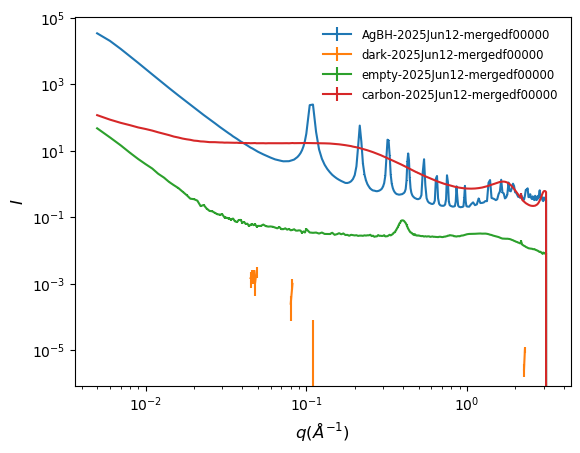

In [6]:
plt.figure()
for sn in dt.samples:
    dt.d1s[sn]['merged'][0].plot(ax=plt.gca())

Take a look at the mask more closely. Adjust if necessary. If you observe high-intensity spikes in the 1D data. It can be helpful to track down the hot pixels following the ring corresponding to the $q$ value where the spike appears.  

<Figure size 600x600 with 0 Axes>

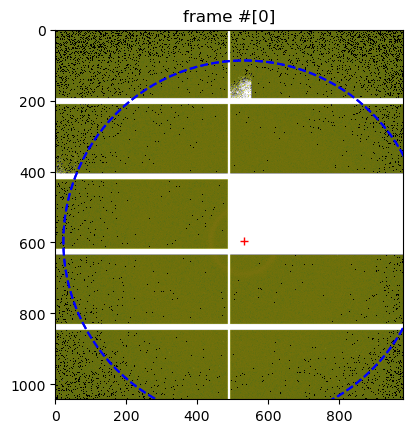

In [11]:
plt.figure(figsize=(6,6))
dt.show_data(sn="empty-2025Jun12", det_ext="_WAXS2", 
             showMask=True, mask_alpha=0.5, showRef=[[2.1], "b--"])

This will show the essential parameters saved in the detector configurations:

In [ ]:
dexp.report()